<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
#1
#Extraccion de variables numericas
numeric_df = df.select_dtypes(include=np.number)

print("Promedios: ",numeric_df.mean())
#Crear dataframe con variables numericas y reemplazar NaN con promedio
numeric_w_mean = numeric_df.fillna(numeric_df.mean())

#Normalizar data
scaler = MinMaxScaler()
columnas = numeric_w_mean.columns
numeric_w_mean[columnas] = scaler.fit_transform(numeric_w_mean[columnas])


Promedios:  year                    2000.787421
desplazamiento             3.321786
cilindros                  5.746493
co2                      473.185008
consumo_litros_milla       0.201134
dtype: float64


In [4]:
#2
cat_df = df.select_dtypes(include=object)
cat_df = pd.get_dummies(cat_df)

cat_df.head(10)


,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
9,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


get_dummies realiza una codificación binaria de las variables categoricas en donde a una clase le asigna el valor 0 y a otra el valor 1. Esto lo hace creando nuevas variables con los valores posibles que tiene cada clase, por ejemplo la variable clase_tipo tenia valores posibles Camionetas, Coche Familiar, Coches Grandes, Coches Medianos, Coches pequeños, Deportivos, Furgoneta y Vehiculos Especiales, a cada uno de estos valores posibles se le asigna una columna y en caso de que el dato se encuentre en la categoria se asigna un 1, si no se encuentra se asigna 0.

In [5]:
#3
#juntamos los datos con concat
df_procesado = pd.concat([numeric_w_mean,cat_df],axis=1)
df_procesado.head(10)

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
5,0.382353,0.205128,0.142857,0.302243,0.224599,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
6,0.382353,0.205128,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7,0.382353,0.307692,0.285714,0.334805,0.260784,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8,0.411765,0.217949,0.142857,0.302243,0.224599,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
9,0.411765,0.217949,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [6]:
#1 Ajuste del modelo
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

#2 Cluster y centros
centroids = kmeans.cluster_centers_  #Centros
cluster = kmeans.labels_ #clusters

#3
#Promedio de variables numéricas
df["cluster"] = cluster
df["cluster"] = df["cluster"].astype("category")
df.groupby(["cluster"]).mean()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,2004.016805,3.425859,6.193629,468.330734,0.199476
1,2000.216945,4.117672,6.581729,537.657591,0.228489
2,2003.704695,2.704675,4.940074,407.457375,0.172955
3,2003.358478,1.922741,4.044562,327.754130,0.139615
4,1999.383070,4.989295,7.677866,651.626738,0.275718
5,1997.860657,3.184894,5.595112,468.519901,0.199416
6,1998.528821,2.345201,4.430432,406.876555,0.172926
7,1997.064021,5.167600,8.031159,662.049423,0.281385


In [7]:
#Moda de cada variable
df.groupby(["cluster"]).agg(pd.Series.mode)#Pandas>=0.16

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
cluster,,,,,,,,,,,,
0,2005,3.0,6.0,493.722222,Coches pequeños,dos,Automatica,Premium,mediano,moderado,moderado,0.199232
1,1985,4.3,6.0,555.437500,Camionetas,dos,Automatica,Normal,grande,alto,alto,0.222671
2,2017,2.0,4.0,423.190476,Coches pequeños,dos,Automatica,Normal,pequeño,bajo,bajo,0.180258
3,2017,2.0,4.0,370.291667,Coches pequeños,dos,Automatica,Normal,muy pequeño,muy bajo,muy bajo,0.157725
4,2003,5.7,8.0,592.466667,Camionetas,cuatro,Automatica,Normal,muy grande,muy alto,muy alto,0.252361
5,1984,3.0,6.0,493.722222,Coches pequeños,dos,Automatica,Normal,mediano,moderado,moderado,0.210301
6,1984,2.0,4.0,423.190476,Coches pequeños,dos,Manual,Normal,pequeño,bajo,bajo,0.180258
7,1984,5.0,8.0,592.466667,Furgoneta,dos,Automatica,Normal,muy grande,muy alto,muy alto,0.252361


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.


In [8]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,102310.085717
1,10,83846.009061
2,20,66365.709007
3,30,56601.126124
4,50,45069.365484


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

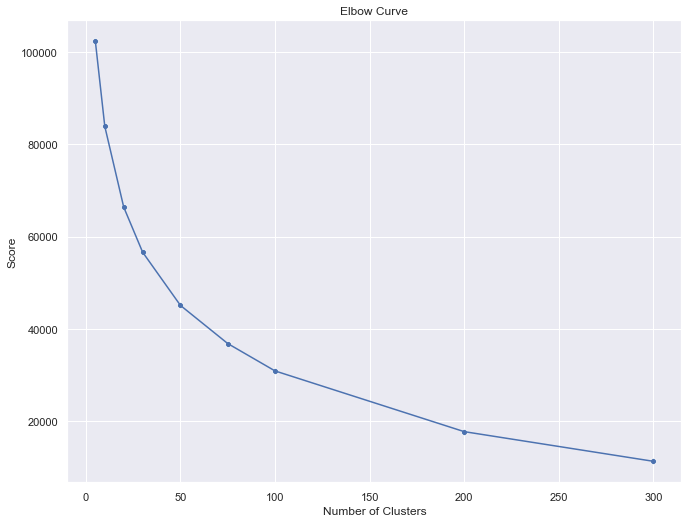

In [9]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Segun la regla del codo se puede escoger 200 como el numero de cluster debido a que la cantidad el score se tiene a estabilizar luego de esa cantidad 